## Homework 2 - Sklearn

#### On grading

The homework is graded on a scale from 0 to 100. For each question we indicate how many points you can get. If the answer is not completely correct but nonetheless on the right track, we may decide to give partial credit.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [26]:
first_image = digits.images[0]
print("Digits is a N={} dataset of handwritten digits, stored as {} by {} gray-scale images".format(
digits.images.shape[0], first_image.shape[0], first_image.shape[1]))

Digits is a N=1797 dataset of handwritten digits, stored as 8 by 8 gray-scale images


If you like you can get a description of the dataset by executing the cell below

In [6]:
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

#### Image representation

An image is a 2-dimensional array of integers in the range 0-15. The value of a cell represents the intensity of the ink at that location, i.e. how black the cell should be rendered. A cell with a value of zero will be rendered as white, while a value of 15 signifies the darkest black. Values in between are grayscale.

In [7]:
first_image

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Can you guess what digit this? Otherwise the representation below might help

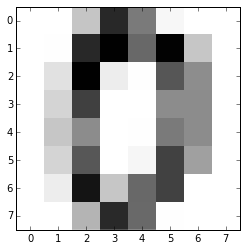

In [8]:
plt.imshow(first_image, cmap='Greys', interpolation='none');

In [9]:
first_image.reshape(-1).shape

(64,)

Labels are supplied in the `target` attribute of the `digits` object. The labels are integers corresponding to the digits.

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Assignment 1: Plot the first 8 in the dataset (10 pts)

(1797, 8, 8)

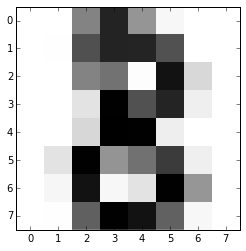

In [11]:
# Your code here
first_8_image = digits.images[digits.target == 8][0]
plt.imshow(first_8_image, cmap='Greys', interpolation='none');
digits.images.shape

### Assignment 2: Average images for different classes (15 pts)

Plot the digits left to right, starting with 0 in the upper left corner, 1 in the upper right corner, etc. 

Use the `fig` and `axes` data structure returned from the `plt.subplots` command. The `axes` is actually a two-dimensional array of subplots,  where subplots may be referenced by row and column indices. For instance, the plot in the upper right corner (at row 0 and column 1) can be accessed by

````
axes[0, 1]
````

The axis object supports all the usual plotting commands: `plot()`, `scatter()`, `hist()`, `imshow()`, etc.

Optional: Try to plot image with the least and most ink for each digit to get a feel for the variation.

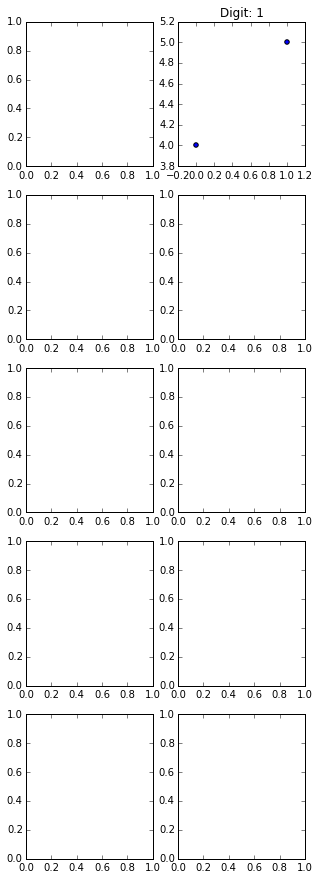

In [12]:
fig, axes = plt.subplots(5, 2)
fig.set_size_inches(5, 15)

# Plot a straight line in the upper right corner.
# Replace by your own code
ax = axes[0, 1]
ax.scatter([0, 1], [4, 5])
ax.set_title("Digit: 1")

### Assignment 3: Flatten the images to 1-dim (10 pts)

The 2-dimensional images must be converted to 1-dimensional feature vectors before they we can feed them to the machine learning algorithms in sklearn. The simplest (although perhaps not best) way to do this is to string the rows together, such that the last element of the previous row would be adjacent to the first element of the next row. 

As an example, after this transformation the 3 by 2 array below

In [14]:
print(np.array([[1,2], [3, 4], [5, 6]]))

[[1 2]
 [3 4]
 [5 6]]


would become this 6 element array:

In [15]:
print(np.array([1,2, 3, 4, 5, 6]))

[1 2 3 4 5 6]


**Exercise** Convert the `numbers_2d` array to a one-dimensional `numpy` array called `numbers_1d`. 

Hint: Use the `.reshape()` method on the array object.

In [16]:
numbers_2d = np.array([[1,2], [3, 4], [5, 6]])

# Your code here

**Exercise** Reshape the entire images array, which has three dimensions, to a two-dimensional array. Save the converted array as `images_flat`. Check that 

```
images_flat.shape
```

outputs 

```
(1797, 64)
```


In [17]:
# Your code here

### Assignment 4: Binary classification - 7 vs 1 (15 pts)

In this assigment you will learn a binary classifier to distinguish between the two digits `digit_a` and `digit_b`. Your classifier will thus only be trained on a subset of the images, namely those that have *either* class `digit_a` *or* class `digit_b`.

We begin by choosing **7** and **1** as our two digits

In [18]:
digit_a = 7
digit_b = 1

You will now need to two do a couple of things to get your data ready for the classifier

* Select the subset of flattened images and labels that have label `digit_a` or label `digit_b` and store them in new variables.
* Change your labels, which will be a mix of the integers `digit_a` and `digit_b`, to 0 and 1. Sklearn unfortunately cannot handle arbitrary labels. Although you can accomplish this in several ways, the most consistent approach is to use `LabelEncoder`, which also works when you have more than two classes.
* Split the data and labels into training and test sets using `train_test_split`. The test set should make up 20% of the instances. Supply `random_state=42` parameter to the `train_test_split` command. This ensures that the split is the same everytime you run the command, making it easier for us to check your results.

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

# Your code here


Start by importing `LogisticRegression` and initialize a classifier object. Then fit a model on the training set and obtain predictions on the test set.

Assuming you named your test data `X_test` and test labels `y_test`, you should be able to check the performance of your model by writing 

````
print classification_report(y_test, y_pred)
````

In [20]:
from sklearn.metrics import classification_report

# Your code here


### Exercise 5: Plot most important features (15 pts)

Here we will re-use the model from the previous question to get a closer look at the coefficients (or weights) that it has learned. Recall each weight corresponds to a particular pixel location in the image. When a learned weight has a large magnitude (i.e. large absolute value), it plays a large role in the classificationd decision. In fact the larger the weight the more important the feature is.

The idea is to use plotting to gain insight into the model. We ask you to two plots -- one for each digit class -- showing the location and strength of the important weights. You can use the same basic technique as for plotting digits, except the intensity of the pixels should come from the weights.

The two plots should be identical, except: 

* The first plot must display only weights counting towards a classification as **7**.
* The second plot must show only weights counting towards a classification as **1**.

In [21]:
# Your code here


If you did this correctly the plots should be easy (i.e. not impossible) to interpret. In case you feel like exploring, try to do the plots for other pairs of digits

### Exercise 6: Make all pairwise classifications (10 pts)

In one of the previous questions we asked you to learn a model to classify pairs of digits. Now you are going to extend that approach to classify all pairs of digits. You should be able to reuse most of the code you have written for the previous question.

The accuracy of each pair-wise classifier should be saved in a 10 by 10 pandas `DataFrame`. Note that you only need to fill the values above the diagonal, since the model for pair (a, b) is the same as the model for pair (b, a).

In [22]:
# Your code here


### Assignment 7: Do true multi-class classification (10 pts)

All classifiers in sklearn come with multi-class support. For `LogisticRegression` multi-class is implemented as a series of binary classification decisions, where each decision is between some class $i$ and the remaining classes. E.g. is this digit a **7** or some other digit? This particular type of multi-class classification is referred to as *one-vs-all*. Happily all this takes place behind the scenes and you are handed the final decision of by the `predict` method of the ``LogisticRegression` object.

You should train a `LogisticRegression` classifier directly on the complete set of flattened images and integer labels and print the classification report.

In [23]:
# Your code here


How well are we doing? Compare your results with state-of-the-art at Rodrigo Benenson's [object recognition benchmark page]( http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

### Assignment 8: Perform cross-validation (15 pts)

In this question you will be comparing two cross-validation strategies:

- $k$-fold CV, which divides the dataset into $k$ parts. One by one, each of these parts are used as the test set, while the remaining $k-1$ parts constitute the training set. 
- Stratified $k$-fold CV, which works as above, but ensures that the proportion of instances of different classes in each part is the same

The two strategies are implemented as `KFold` and `StratifiedKFold` in sklearn. Both are imported in the cell below. 

We will consider $k=10$. For each of the two strategies, you should build a 10 by 10 pandas `DataFrame`, which, for each fold, shows the number of instances in each class. In this `DataFrame`, rows correspond to folds and columns to digit classes. 

When you initialize the `KFold` object, please set the `shuffle` parameter to `True`.

In [24]:
from sklearn.cross_validation import KFold, StratifiedKFold

# Your code for the KFold table here


In [25]:
# Your code for the StratifiedKFold table here
